## Customer churn analysis

### Importing required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

### Data import

In [2]:
data = pd.read_csv('Telco-Customer-Churn.csv')

In [3]:
df=data.copy()

### Unerstanding the dataset

In [4]:
df.shape

(7043, 21)

* dataset contains 7043 rowa and 21 columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 



*  The data type of TotalCharges column is set to 'object' which should be 'float'

In [6]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [7]:
# checking if there are any duplicate data
df.duplicated().sum()

0

* There is no duplicate data present therefore its good to proceed further

In [8]:
#replacing empty string values with null using np.nan
df['TotalCharges']=df['TotalCharges'].replace(' ',np.nan)

In [9]:
#lets check the null values in the totalcharges column
null_in_totalCharges=df.TotalCharges.isnull().sum()

In [10]:
# checking the percentage of  null values in the totalcharges 
percent_of_Null = null_in_totalCharges/df.shape[0]*100
print('percent_null_in_totalCharges',percent_of_Null)

percent_null_in_totalCharges 0.1561834445548772


In [11]:
# droping the null values fro entire dataset
df=df.dropna()

In [12]:
# rechecking if there are any null valuse that are missed
df.TotalCharges.isnull().sum()

0

In [13]:
df.shape

(7032, 21)

In [14]:
# changing the datatype of the totalcharges column to float type
df['TotalCharges']=df['TotalCharges'].astype('float')

In [15]:
## checking the dtype of the totalcharges column
np.dtype(df.TotalCharges)

dtype('float64')

In [16]:
df=df.drop(columns='customerID')


*  The raw dataset contained 7043 rows and 21 columns, after the cleaning process its left with 7032  rows and 21 columns
*  The totalcharges column contains numerical data but it was set to 'object' so we changet the data type to float
*  we checked for the duplicates, there were no duplicates found
*  overall data contained 0.15% of null values so we droped all the nulls
*  droped column customerID as we dont need it

## EDA [EXPLORATORY DATA ANALYSIS]

In [17]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


* nulerical data = { 'tenure', 'MonthlyCharges', 'Totalcharges'}
* categorical datas =  { 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
      , 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMet }od'}

In [18]:
df['SeniorCitizen']=df['SeniorCitizen'].apply(lambda x: 'Yes' if x==1 else 'No')

In [19]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


## Univariate analysis

### Numerical Features

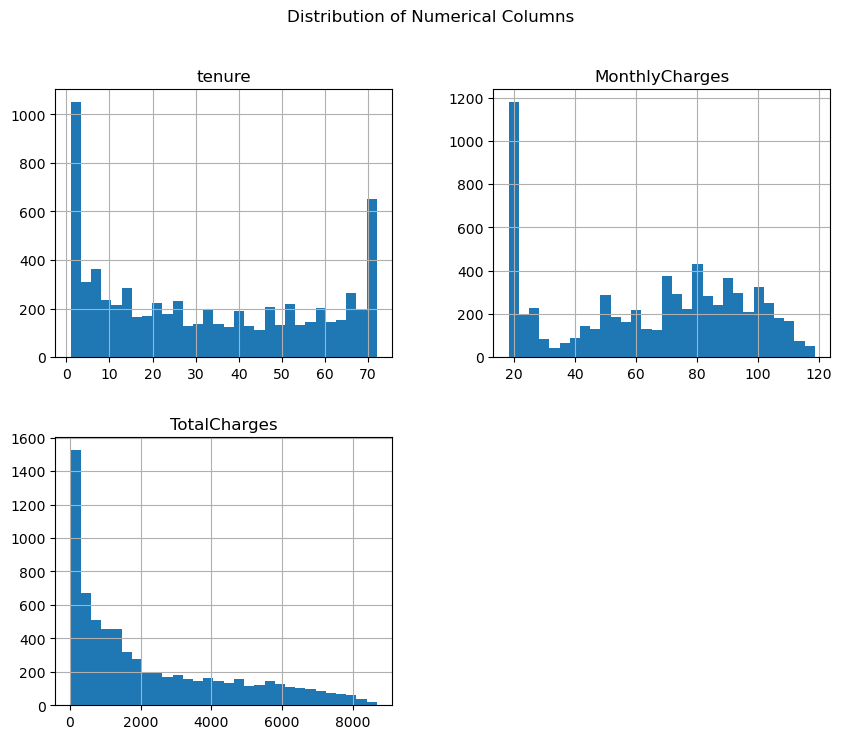

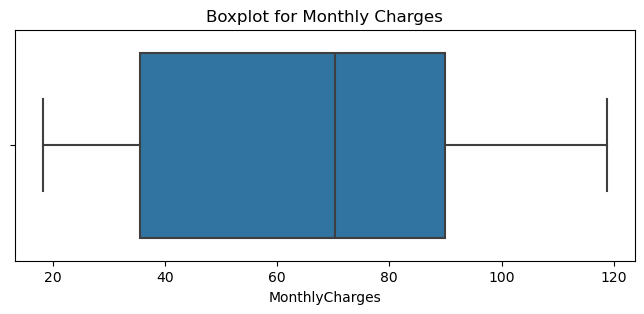

In [20]:
# Histogram for numerical columns
df[['tenure', 'MonthlyCharges', 'TotalCharges']].hist(bins=30, figsize=(10,8))
plt.suptitle('Distribution of Numerical Columns')
plt.show()

# Boxplot to check for outliers
plt.figure(figsize=(8,3))
sns.boxplot(data=df, x='MonthlyCharges')
plt.title('Boxplot for Monthly Charges')
plt.show()

### Categorical Features

### seniorCitizen 

In [21]:
print(df['SeniorCitizen'].value_counts(normalize=True)*100)

SeniorCitizen
No     83.759954
Yes    16.240046
Name: proportion, dtype: float64


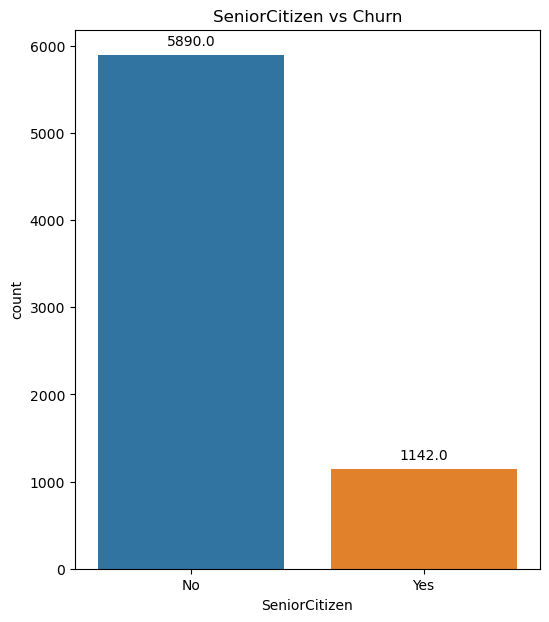

In [22]:
plt.figure(figsize=(6,7))
ax=sns.countplot(data=df,x='SeniorCitizen')
# Adding frequency values on top of the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', xytext=(0, 5),
                textcoords='offset points')
plt.title('SeniorCitizen vs Churn')
plt.show()

### Insights
* 83.7% are non_senior_citizen
* 16.2% are seniorCitizen

### Gender and Churn

gender
Male      50.469283
Female    49.530717
Name: proportion, dtype: float64
Churn
No     73.421502
Yes    26.578498
Name: proportion, dtype: float64


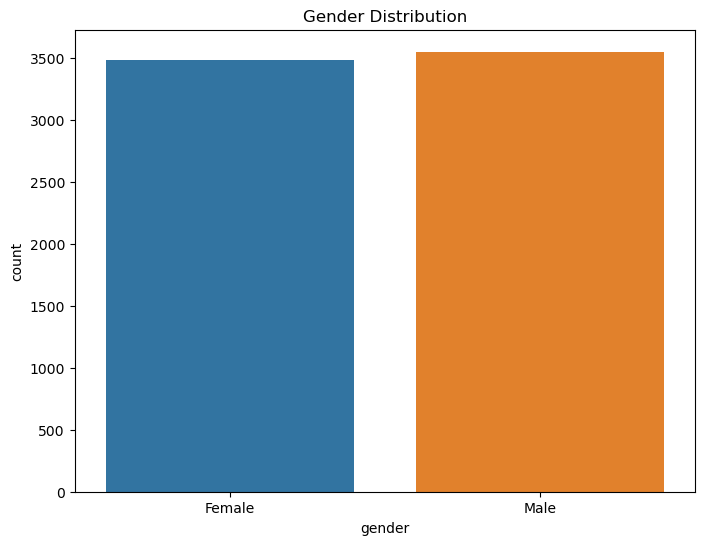

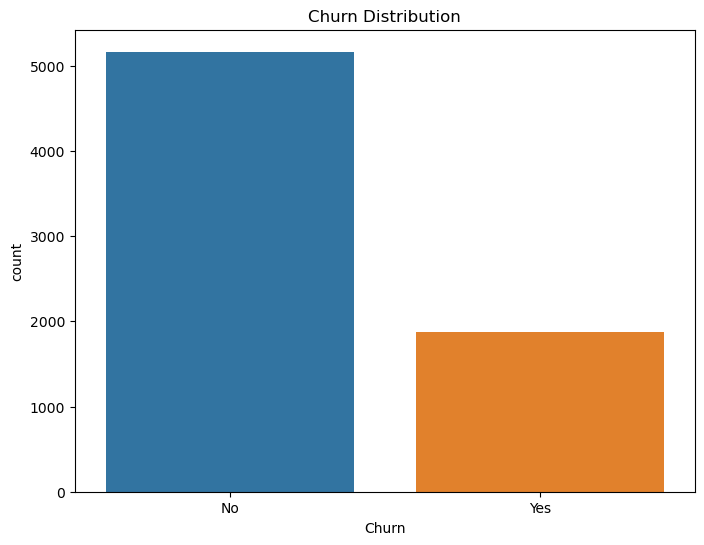

In [23]:
# Count the unique values in categorical columns
gender_count=df['gender'].value_counts(normalize = 'true')*100
churn_count=df['Churn'].value_counts(normalize = 'true')*100
print(gender_count)
print(churn_count)
# Visualize categorical columns
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='gender')
plt.title('Gender Distribution')
plt.show()

plt.figure(figsize=(8,6))
sns.countplot(data=df, x='Churn')
plt.title('Churn Distribution')
plt.show()

### insights
* This suggests that the gender distribution is almost balanced between male and female customers.
* 73.4% customer do not churn though 26.5% customer churn

### Bivarient Analysis

## Gender vs Churn

Churn          No        Yes
gender                      
Female  73.040482  26.959518
Male    73.795435  26.204565


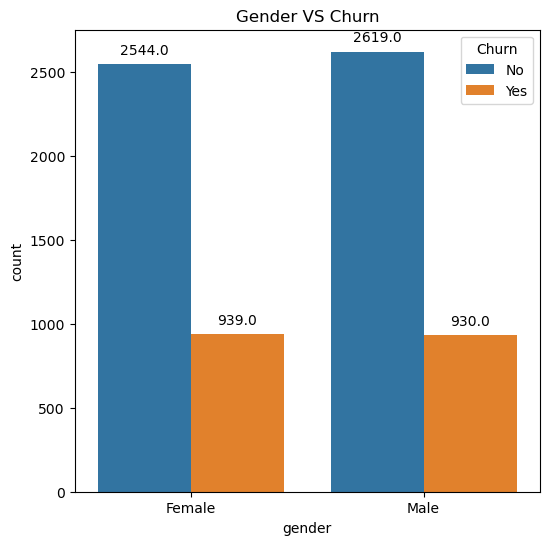

In [24]:
churn_rate_by_gender = df.groupby('gender')['Churn'].value_counts(normalize=True).unstack()*100
print(churn_rate_by_gender)

plt.figure(figsize=(6,6))
ax=sns.countplot(data=df,x='gender',hue='Churn')
# Adding frequency values on top of the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', xytext=(0, 5),
                textcoords='offset points')
plt.title('Gender VS Churn')
plt.show()

### insights
* this shows that gender is not affecting the churn rate

### internet service and Contract churn 

Internet_service_churn_percentage 
 InternetService  Churn
DSL              No       81.001656
                 Yes      18.998344
Fiber optic      No       58.107235
                 Yes      41.892765
No               No       92.565789
                 Yes       7.434211
Name: proportion, dtype: float64

Contract_churn_percentage 
 Contract        Churn
Month-to-month  No       57.290323
                Yes      42.709677
One year        No       88.722826
                Yes      11.277174
Two year        No       97.151335
                Yes       2.848665
Name: proportion, dtype: float64


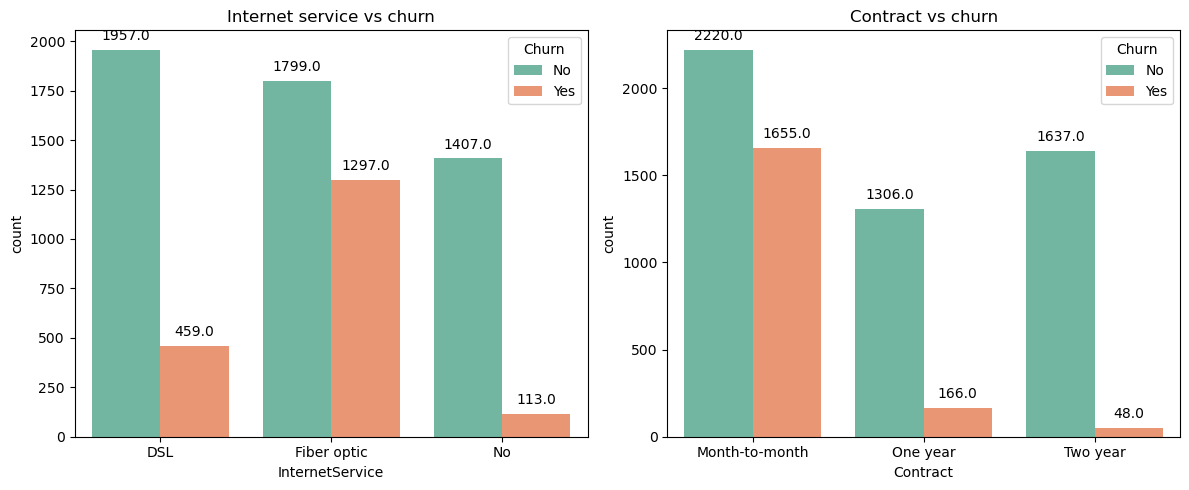

In [25]:
internet_service_churn = df.groupby(by='InternetService')['Churn'].value_counts(normalize = True)*100
print('Internet_service_churn_percentage \n',internet_service_churn)

# DIstribution of contract vs churn
contract_churn = df.groupby(by='Contract')['Churn'].value_counts(normalize = True)*100
print('\nContract_churn_percentage \n',contract_churn)

# Visualizing the distribution using count plots
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
ax=sns.countplot(x='InternetService',hue='Churn', data=df, palette='Set2')
# Adding frequency values on top of the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', xytext=(0, 5),
                textcoords='offset points')
plt.title('Internet service vs churn')

plt.subplot(1, 2, 2)
ax=sns.countplot(x='Contract',hue='Churn', data=df, palette='Set2')
# Adding frequency values on top of the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', xytext=(0, 5),
                textcoords='offset points')
plt.title('Contract vs churn')

plt.tight_layout()
plt.show()

* Customers with Fiber Optic internet service have the highest churn rate (41.89%). 
* Customers with DSL internet service have a moderate churn rate (18.99%).
* Customers with no internet service have the lowest churn rate (7.43%).
* Customers with Month-to-Month contracts have the highest churn rate (42.71%).
* Customers with One-Year contracts have a significantly lower churn rate (11.28%).
* Customers with Two-Year contracts have the lowest churn rate (2.85%).

### seniorCittizen vs churn

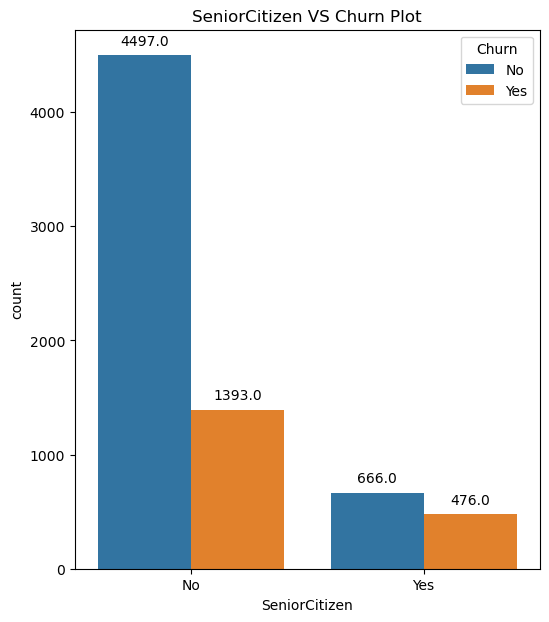

In [26]:
senior_citizen_count = df.groupby(by='SeniorCitizen')['Churn'].value_counts().reset_index()
senior_citizen_count

plt.figure(figsize=(6,7))
ax=sns.countplot(data=df,x='SeniorCitizen',hue='Churn')
# Adding frequency values on top of the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', xytext=(0, 5),
                textcoords='offset points')
plt.title('SeniorCitizen VS Churn Plot')
plt.show()

### insights
* Higher Churn Rate for Senior Citizens: The plot clearly shows that a significantly higher proportion of senior citizens churn compared to non-senior citizens

### Correlation analysis

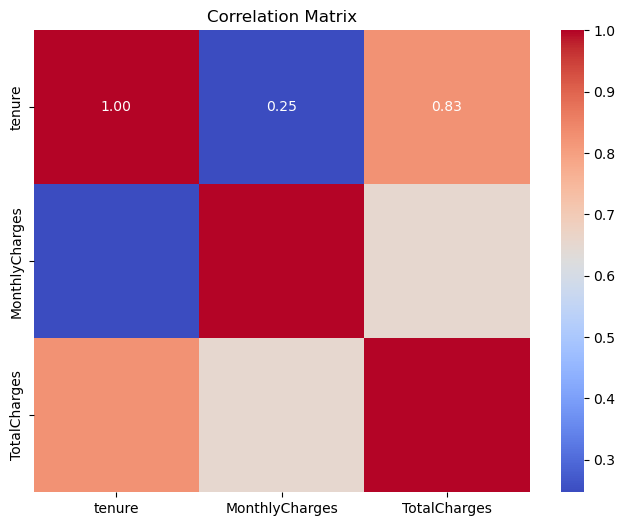

In [27]:
# Correlation matrix
correlation_matrix = df[['tenure', 'MonthlyCharges', 'TotalCharges']].corr()

# Visualize the correlation matrix
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


 * TotalCharges is strongly correlated with both tenure and MonthlyCharges.
* Tenure and MonthlyCharges have a weak relationship.

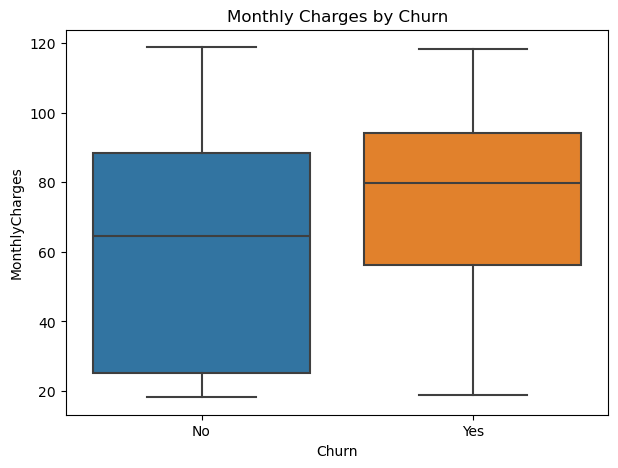

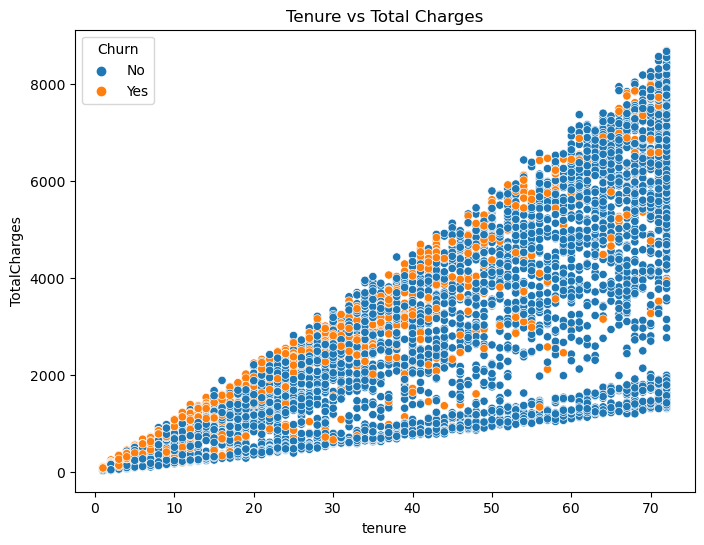

In [28]:
# Boxplot to compare MonthlyCharges with Churn
plt.figure(figsize=(7,5))
sns.boxplot(data=df, x='Churn', y='MonthlyCharges')
plt.title('Monthly Charges by Churn')
plt.show()

# Scatter plot between tenure and TotalCharges
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='tenure', y='TotalCharges', hue='Churn')
plt.title('Tenure vs Total Charges')
plt.show()

* Churned Customers Tend to Have Higher Monthly Charges
* There is a strong positive correlation between tenure and total charges. This means that customers with longer tenures tend to have higher total charges.

*  Churned customers are scattered across the plot, indicating that churn is not solely determined by tenure and total charges. There are customers with both high and low tenures and total charges who have churned.

### relationships between numerical variables

<Figure size 1500x800 with 0 Axes>

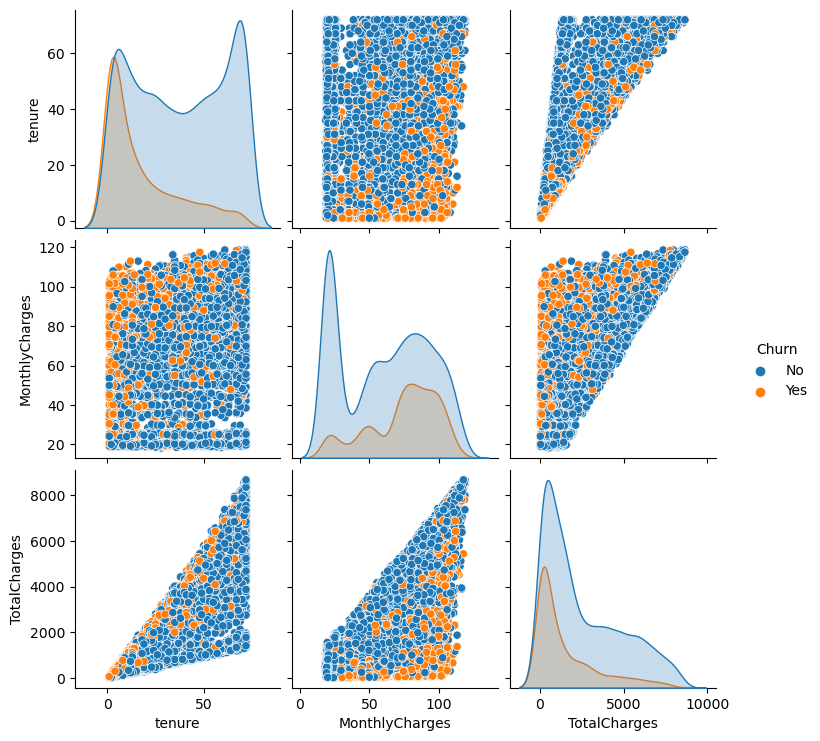

<Figure size 640x480 with 0 Axes>

In [29]:
# Pairplot to visualize relationships between numerical variables
plt.figure(figsize=(15,8))
sns.pairplot(df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']], hue='Churn', diag_kind='kde')
plt.show()
plt.savefig('my_plot.pdf', dpi=300, bbox_inches='tight')  # Saves the plot as a PDF



## Feature Engineering

### Transform TotalCharges

In [30]:
df['AverageMonthlyCharges'] = df['TotalCharges'] / (df['tenure'] + 1)  # Adding 1 to avoid division by zero
df['AverageMonthlyCharges'] .head()

0    14.925000
1    53.985714
2    36.050000
3    40.016304
4    50.550000
Name: AverageMonthlyCharges, dtype: float64

### Tenure Binning

In [31]:
bins = [0, 12, 24, 36, 48, 60, 80]
labels = ['New', '1-2 years', '2-3 years', '3-4 years', '4-5 years','5+ years']
df['TenureGroup'] = pd.cut(df['tenure'], bins=bins, labels=labels)
df[['TenureGroup','tenure']].head()

,TenureGroup,tenure
0,New,1
1,2-3 years,34
2,New,2
3,3-4 years,45
4,New,2


In [32]:
## tenuregroup valueCounts
df['TenureGroup'].value_counts()

TenureGroup
New          2175
5+ years     1407
1-2 years    1024
2-3 years     832
4-5 years     832
3-4 years     762
Name: count, dtype: int64

In [33]:
## checking if there is any null values in tenureGroup
df.TenureGroup.isnull().sum()

0

In [34]:
## checking for null values and percentage of null values in tenuregroup
null_in_tenuregroup=df.TenureGroup.isnull().sum()
print('null_in_tenuregroup',null_in_tenuregroup)
percent_of_Null_in_tenureGroup = null_in_tenuregroup/df.shape[0]*100
print('percent_null_in_tenureGroup',percent_of_Null_in_tenureGroup)

null_in_tenuregroup 0
percent_null_in_tenureGroup 0.0


* There is no null values in the tenureGroup column
  

In [35]:
tenure_churn = df.groupby(by='TenureGroup')['Churn'].value_counts().reset_index()
tenure_churn

,TenureGroup,Churn,count
0,New,No,1138
1,New,Yes,1037
2,1-2 years,No,730
3,1-2 years,Yes,294
4,2-3 years,No,652
5,2-3 years,Yes,180
6,3-4 years,No,617
7,3-4 years,Yes,145
8,4-5 years,No,712
9,4-5 years,Yes,120


Text(0.5, 1.0, 'TenureGroup vs Churn')

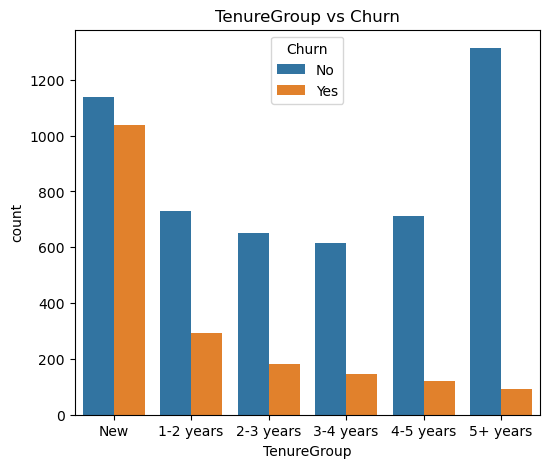

In [36]:
plt.figure(figsize=(6,5))
sns.countplot(data=df,x='TenureGroup',hue='Churn')
plt.title('TenureGroup vs Churn')


### insights
* New Customers are More Prone to Churn
* Customers with more tenure churn less

In [37]:
df['Contract_PaymentMethod'] = df['Contract'] + "_" + df['PaymentMethod']
df['Contract_PaymentMethod'].head()

0       Month-to-month_Electronic check
1                 One year_Mailed check
2           Month-to-month_Mailed check
3    One year_Bank transfer (automatic)
4       Month-to-month_Electronic check
Name: Contract_PaymentMethod, dtype: object

In [38]:
contract_payment = df.groupby(by='Contract_PaymentMethod')['Churn'].value_counts().reset_index()
contract_payment.columns=['ContractPaymentMethod','churn','Count']
contract_payment.head()

,ContractPaymentMethod,churn,Count
0,Month-to-month_Bank transfer (automatic),No,388
1,Month-to-month_Bank transfer (automatic),Yes,201
2,Month-to-month_Credit card (automatic),No,365
3,Month-to-month_Credit card (automatic),Yes,178
4,Month-to-month_Electronic check,Yes,994


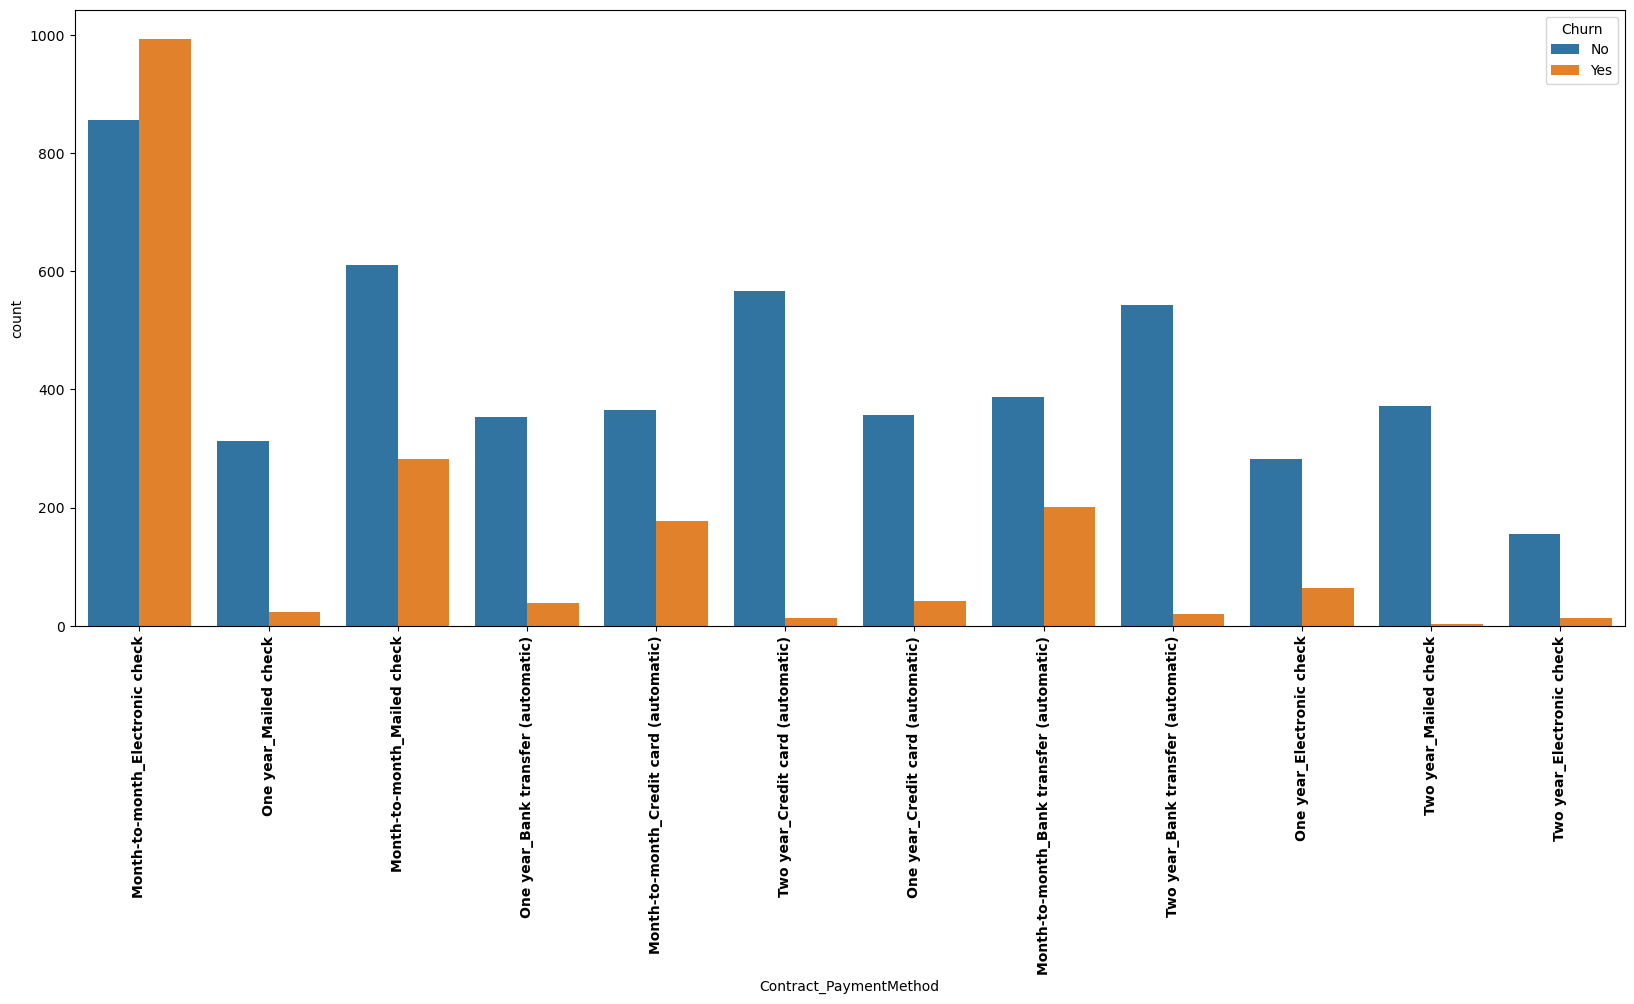

In [39]:
plt.figure(figsize=(20,8))
sns.countplot(data=df,x='Contract_PaymentMethod',hue='Churn')
plt.xticks(rotation=90,fontweight='bold')
plt.show()

### insights
* Month-to-Month Electronic Check has the highest churn rate
* Customers with month-to-month contracts who pay by electronic check are more likely to churn.
* Customers with two-year contracts, especially those who pay by credit card or bank transfer, have the lowest churn rates

### One-Hot-Encoding
### For categorical variables


In [40]:
# droped columns we dont need it
df=df.drop(columns=['Contract','PaymentMethod'])

In [41]:
# using one-hot-encoding 
df = pd.get_dummies(df, columns=['TenureGroup','Churn','gender','SeniorCitizen','TechSupport','PaperlessBilling', 'Dependents','Contract_PaymentMethod','Partner','PhoneService','StreamingMovies','StreamingTV','MultipleLines','OnlineSecurity','OnlineBackup','InternetService','DeviceProtection'], drop_first=True)
df.head()

,tenure,MonthlyCharges,TotalCharges,AverageMonthlyCharges,TenureGroup_1-2 years,TenureGroup_2-3 years,TenureGroup_3-4 years,TenureGroup_4-5 years,TenureGroup_5+ years,Churn_Yes,...,MultipleLines_No phone service,MultipleLines_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,InternetService_Fiber optic,InternetService_No,DeviceProtection_No internet service,DeviceProtection_Yes
0,1,29.85,29.85,14.925000,False,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False
1,34,56.95,1889.50,53.985714,False,True,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
2,2,53.85,108.15,36.050000,False,False,False,False,False,True,...,False,False,False,True,False,True,False,False,False,False
3,45,42.30,1840.75,40.016304,False,False,True,False,False,False,...,True,False,False,True,False,False,False,False,False,True
4,2,70.70,151.65,50.550000,False,False,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False


In [42]:
df.shape

(7032, 43)

In [43]:
# Converting all Boolean columns to numerical
for col in df.columns:
    if df[col].dtype == 'bool':
        df[col] = df[col].astype(int)
df.head()

,tenure,MonthlyCharges,TotalCharges,AverageMonthlyCharges,TenureGroup_1-2 years,TenureGroup_2-3 years,TenureGroup_3-4 years,TenureGroup_4-5 years,TenureGroup_5+ years,Churn_Yes,...,MultipleLines_No phone service,MultipleLines_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,InternetService_Fiber optic,InternetService_No,DeviceProtection_No internet service,DeviceProtection_Yes
0,1,29.85,29.85,14.925000,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,34,56.95,1889.50,53.985714,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,2,53.85,108.15,36.050000,0,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0
3,45,42.30,1840.75,40.016304,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1
4,2,70.70,151.65,50.550000,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [44]:
# df.info()

In [45]:
# Renamming the variables
df.rename(columns={'Contract_PaymentMethod_Month-to-month_Credit card (automatic)':'ContractPayMonth_Credit_Card',
                   'Contract_PaymentMethod_Month-to-month_Electronic check':'ContractPayMonth_Electronic_Check',
                  'Contract_PaymentMethod_Month-to-month_Mailed check':'ContractPayMonth_Mailed_Check',
                  'Contract_PaymentMethod_One year_Bank transfer (automatic)':'ContractPay_1Year_BankTransfer',
                  'Contract_PaymentMethod_One year_Credit card (automatic)':'ContractPay_1Year_CreditCard',
                  'Contract_PaymentMethod_One year_Electronic check':'ContractPay_1Year_ElectronicCheck',
                  'Contract_PaymentMethod_One year_Mailed check':'ContractPay_1Year_MaliedCheck',
                  'Contract_PaymentMethod_Two year_Bank transfer (automatic)':'ContractPay_2Years_BankTransfer',
                  'Contract_PaymentMethod_Two year_Credit card (automatic)':'ContractPay_2Years_CreditCard',
                  'Contract_PaymentMethod_Two year_Electronic check':'ContractPay_2Years_ElectronicCheck',
                  'Contract_PaymentMethod_Two year_Mailed check':'ContractPay_2Years_MailedCheck'},inplace=True)

In [47]:
df.head()

,tenure,MonthlyCharges,TotalCharges,AverageMonthlyCharges,TenureGroup_1-2 years,TenureGroup_2-3 years,TenureGroup_3-4 years,TenureGroup_4-5 years,TenureGroup_5+ years,Churn_Yes,...,MultipleLines_No phone service,MultipleLines_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,InternetService_Fiber optic,InternetService_No,DeviceProtection_No internet service,DeviceProtection_Yes
0,1,29.85,29.85,14.925000,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,34,56.95,1889.50,53.985714,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,2,53.85,108.15,36.050000,0,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0
3,45,42.30,1840.75,40.016304,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1
4,2,70.70,151.65,50.550000,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
